# AI - Project 04- Mohsen Fayyaz - 810196650

# 1) Decision Tree


In [100]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics  # Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib

In [101]:
# load dataset
data = pd.read_csv("data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [102]:
# split dataset in features and target variable
X = data.drop(columns=['target'])  # Features
y = data.target  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 80% training and 20% test

def predict(X_train, y_train, X_test):
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(random_state=10)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    return y_pred

# Model Accuracy, how often is the classifier correct?
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, predict(X_train, y_train, X_test)))

Decision Tree Accuracy: 0.6885245901639344


In [103]:
def print_tree(clf):
#     import graphviz 
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(150, 100)
    tree.plot_tree(clf, filled=True, rounded=True, class_names=True)
#     dot_data = tree.export_graphviz(clf, out_file=None,  
#                       filled=True, rounded=True,  
#                       special_characters=True)  
#     graph = graphviz.Source(dot_data)
#     graph 

# print_tree(DecisionTreeClassifier().fit(X_train, y_train))

# 2) Random Forest

## 2.1) $5\times150$

In [104]:
# Sampling 150 elements from train set
X_samples = [X_train.sample(n=150, replace=True) for i in range(5)]
y_samples = [y_train[i.index] for i in X_samples]

## 2.2) Bootstrap Aggregating (Bagging)

In [105]:
predictions = [predict(X_train, y_train, X_test) for X_train, y_train in  zip(X_samples, y_samples)]
ensemble_pred = list()

for i in range(len(X_test)):
    this_data_preds = [predict[i] for predict in predictions]
    ensemble_pred.append(max(set(this_data_preds), key = this_data_preds.count))  # Majority Vote
    
    if i < 10: print("Votes:", this_data_preds, "Majority:", max(set(this_data_preds), key = this_data_preds.count))

print("Bagging Accuracy:", metrics.accuracy_score(y_test, ensemble_pred))

Votes: [0, 0, 0, 0, 0] Majority: 0
Votes: [1, 1, 1, 0, 1] Majority: 1
Votes: [0, 0, 0, 0, 0] Majority: 0
Votes: [0, 0, 0, 0, 0] Majority: 0
Votes: [0, 0, 0, 1, 0] Majority: 0
Votes: [0, 0, 0, 0, 0] Majority: 0
Votes: [0, 0, 0, 0, 0] Majority: 0
Votes: [1, 1, 1, 0, 1] Majority: 1
Votes: [0, 0, 0, 0, 0] Majority: 0
Votes: [1, 1, 1, 1, 1] Majority: 1
Bagging Accuracy: 0.7377049180327869


## 2.3) Eliminating Worst Feature

In [106]:
for del_col_name in X_train.columns:
    limited_X_train = X_train.drop(columns=[del_col_name])  # Features
    limited_X_test = X_test.drop(columns=[del_col_name])  # Test
    pred = predict(limited_X_train, y_train, limited_X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, pred), del_col_name)

Accuracy: 0.7540983606557377 age
Accuracy: 0.7213114754098361 sex
Accuracy: 0.7213114754098361 cp
Accuracy: 0.7213114754098361 trestbps
Accuracy: 0.7377049180327869 chol
Accuracy: 0.7704918032786885 fbs
Accuracy: 0.7377049180327869 restecg
Accuracy: 0.7213114754098361 thalach
Accuracy: 0.7377049180327869 exang
Accuracy: 0.7540983606557377 oldpeak
Accuracy: 0.6885245901639344 slope
Accuracy: 0.6557377049180327 ca
Accuracy: 0.7213114754098361 thal


From running multiple times and observing that removing oldpeak gives the highest accuracy among others, we can assume that <b>oldpeak</b> is the best feature to remove.

## 2.4) Random Forest (Select 5 features)

In [107]:
def generate_random_features(n = 5):
    return X_train.columns.to_series().sample(n)

def generate_random_X():
    random_features = generate_random_features()
    random_X_train = X_train[random_features]
    random_X_test = X_test[random_features]
    return random_X_train, random_X_test
    
random_X_train, random_X_test = generate_random_X()

random_X_train

,chol,age,exang,sex,cp
62,186,52,0,1,3
127,277,67,0,0,2
111,126,57,0,1,2
287,232,57,0,1,1
108,244,50,0,0,1
...,...,...,...,...,...
203,274,68,1,1,2
255,309,45,1,1,0
72,204,29,0,1,1
235,299,51,1,1,0


In [108]:
random_features_list = [generate_random_features() for i in range(5)]

# Sampling 150 elements from train set
X_samples = [X_train.sample(n=150, replace=True) for i in range(5)]
y_samples = [y_train[i.index] for i in X_samples]

predictions = [predict(X_train[random_features], y_train, X_test[random_features]) for X_train, y_train, random_features in  zip(X_samples, y_samples, random_features_list)]
ensemble_pred = list()

for i in range(len(X_test)):
    this_data_preds = [predict[i] for predict in predictions]
    ensemble_pred.append(max(set(this_data_preds), key = this_data_preds.count))  # Majority Vote
    
    if i < 10: print("Votes:", this_data_preds, "Majority:", max(set(this_data_preds), key = this_data_preds.count))

print("Random Forest Accuracy:", metrics.accuracy_score(y_test, ensemble_pred))

Votes: [1, 0, 0, 0, 0] Majority: 0
Votes: [1, 0, 1, 1, 1] Majority: 1
Votes: [0, 0, 1, 0, 0] Majority: 0
Votes: [0, 1, 0, 0, 0] Majority: 0
Votes: [1, 0, 1, 0, 0] Majority: 0
Votes: [0, 0, 0, 0, 0] Majority: 0
Votes: [1, 0, 0, 0, 0] Majority: 0
Votes: [1, 1, 1, 0, 0] Majority: 1
Votes: [0, 0, 0, 0, 0] Majority: 0
Votes: [1, 1, 1, 1, 1] Majority: 1
Random Forest Accuracy: 0.7704918032786885


# Bootstrap
Given a standard training set $D$ of size n, bagging generates m new training sets $D_i$, each of size n′, by sampling from D uniformly and with replacement. By sampling with replacement, some observations may be repeated in each $D_i$. If n′=n, then for large n the set $D_i$ is expected to have the fraction (1 - 1/e) (≈63.2%) of the unique examples of D, the rest being duplicates. This kind of sample is known as a bootstrap sample. Then, m models are fitted using the above m bootstrap samples and combined by averaging the output (for regression) or voting (for classification). 

It reduces variance and helps to avoid overfitting.

# Overfitting
Over-fitting is the phenomenon in which the learning system tightly fits the given training data so much that it would be inaccurate in predicting the outcomes of the untrained data. In decision trees, over-fitting occurs when the tree is designed so as to perfectly fit all samples in the training data set.

Bagging reduces variance and helps to avoid overfitting.

# Random Forest
Random forests differ in only one way from bagging: they use a modified tree learning algorithm that selects, at each candidate split in the learning process, a <b>random subset of the features</b>. This process is sometimes called "feature bagging". 

The reason for doing this is the correlation of the trees in an ordinary bootstrap sample: if one or a few features are very strong predictors for the response variable (target output), these features will be selected in many of the B trees, causing them to become <b>correlated</b>.

# Conclusion
Although this data set and the numbers we used for creating subtrees were not perfect, and considering the fact that running the program again and again would give us different results because of it's random nature, we can see that usually, bagging accuracy is higher than simple decision tree since it stops overfitting. And we can also conclude that random forest can be better than both of the decision tree and bagging because it has not just the benefits of bagging, but also can prevent correlation between trees. 

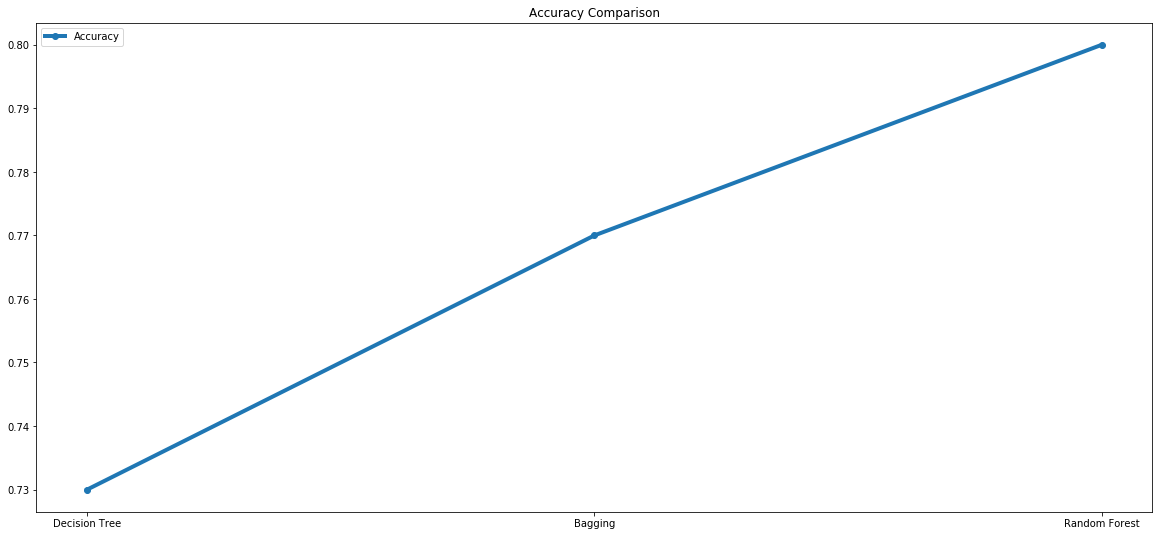

In [109]:
import matplotlib.pyplot as plt

accuracy = [0.73, 0.77, 0.80]
x = ["Decision Tree", "Bagging", "Random Forest"]
line_width = 4

plt.figure(figsize=(20, 9))
plt.plot(x, accuracy, '-o', label="Accuracy", linewidth=line_width)
plt.title("Accuracy Comparison")
# plt.xlabel("1: simple\n2: simple removing both 0\n3: Laplace Smoothing")
# plt.ylabel(".")
plt.legend(loc="upper left")
plt.show()
